<a href="https://colab.research.google.com/github/MarinaTaques/Marina_Portfolio/blob/main/Pandas_Formatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando os nomes

In [ ]:
import pandas as pd

In [ ]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=m")


In [ ]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
9,ALINE,0,509869,10,F
5,JULIANA,0,562589,6,F
1,ANA,0,3079729,2,F
0,MARIA,0,11694738,1,F
17,LUCIANA,0,429769,18,F


In [ ]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
9,MARCOS,0,1101126,10,M
11,GABRIEL,0,922744,12,M
8,LUIZ,0,1102927,9,M
5,PAULO,0,1417907,6,M
6,PEDRO,0,1213557,7,M


In [ ]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 40


In [ ]:
frames = [nomes_f, nomes_m]

In [ ]:
nomes = pd.concat(frames)['nome'].to_frame()

In [ ]:
nomes.head()

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA


##Incluindo ID dos alunos

In [ ]:
import numpy as np
np.random.seed(123)

In [ ]:
total_alunos = len(nomes)
total_alunos

40

In [ ]:
nomes['id_aluno'] = np.random.permutation(total_alunos) +1
nomes.sample(5)

,nome,id_aluno
8,PATRICIA,14
15,BRUNO,20
0,JOSE,26
11,GABRIEL,37
8,LUIZ,10


In [ ]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes.sample(5)

,nome,id_aluno,dominio
14,MARCELO,23,@dominiodoemail.com.br
2,FRANCISCA,13,@servicodoemail.com
12,RAFAEL,33,@servicodoemail.com
9,ALINE,21,@servicodoemail.com
11,CAMILA,38,@dominiodoemail.com.br


In [ ]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
4,ADRIANA,6,@dominiodoemail.com.br,adriana@dominiodoemail.com.br
0,MARIA,7,@dominiodoemail.com.br,maria@dominiodoemail.com.br
13,DANIEL,34,@dominiodoemail.com.br,daniel@dominiodoemail.com.br
15,LETICIA,40,@servicodoemail.com,leticia@servicodoemail.com
11,CAMILA,38,@dominiodoemail.com.br,camila@dominiodoemail.com.br


## Criando a tabela Cursos

In [ ]:
!pip3 install html5lib
!pip3 install lxml

In [ ]:
import html5lib

In [ ]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [ ]:
type(cursos)

list

In [ ]:
cursos = cursos[0]

In [ ]:
type(cursos)

pandas.core.frame.DataFrame

In [ ]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [ ]:
cursos = cursos.rename(columns = {'Nome do curso': 'nome_do_curso'})
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [ ]:
cursos['id'] = cursos.index + 1

In [ ]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [ ]:
cursos = cursos.set_index('id')
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


## Matriculando os alunos nos cursos

In [ ]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
2,ANTONIO,27,@servicodoemail.com,antonio@servicodoemail.com,1
9,MARCOS,16,@dominiodoemail.com.br,marcos@dominiodoemail.com.br,4
6,MARCIA,24,@servicodoemail.com,marcia@servicodoemail.com,7


In [ ]:
nomes.matriculas.describe()

count    40.000000
mean      2.050000
std       1.299901
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       7.000000
Name: matriculas, dtype: float64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


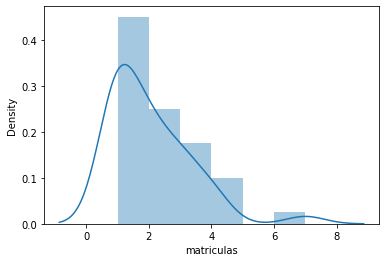

In [ ]:
sns.distplot(nomes.matriculas)

In [ ]:
nomes.matriculas.value_counts()

1    18
2    10
3     7
4     4
7     1
Name: matriculas, dtype: int64

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
15,LETICIA,40,@servicodoemail.com,leticia@servicodoemail.com,2
8,PATRICIA,14,@dominiodoemail.com.br,patricia@dominiodoemail.com.br,1
16,JULIA,4,@servicodoemail.com,julia@servicodoemail.com,1
6,PEDRO,15,@dominiodoemail.com.br,pedro@dominiodoemail.com.br,2
12,AMANDA,25,@servicodoemail.com,amanda@servicodoemail.com,1


## Selecionando cursos

In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
7,LUCAS,1,@servicodoemail.com,lucas@servicodoemail.com,1
3,FRANCISCO,36,@servicodoemail.com,francisco@servicodoemail.com,3
5,PAULO,28,@dominiodoemail.com.br,paulo@dominiodoemail.com.br,1


In [ ]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [ ]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)
  
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [ ]:
matriculas.head()

,id_aluno,id_curso
0,7,2
1,7,10
2,7,3
3,11,11
4,13,1


In [ ]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
11,GABRIEL,37,@servicodoemail.com,gabriel@servicodoemail.com,1
7,LUCAS,1,@servicodoemail.com,lucas@servicodoemail.com,1
14,MARCELO,23,@dominiodoemail.com.br,marcelo@dominiodoemail.com.br,2


In [ ]:
cursos.sample(3)

,nome_do_curso
id,
15,Análise de dados
3,C# para Web
10,Código limpo com C#


In [ ]:
matriculas.head()

,id_aluno,id_curso
0,7,2
1,7,10
2,7,3
3,11,11
4,13,1


In [ ]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,10,Lógica de programação
2,6,Java para Web
3,9,C# para Web
5,3,Cursos de Python
6,8,PHP com MySql


## Saída em dierentes formatos

In [ ]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [ ]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,10,Lógica de programação
1,6,Java para Web
2,9,C# para Web
3,3,Cursos de Python
4,8,PHP com MySql
5,1,.NET para web
6,6,Novas integrações com Java
7,3,TDD com Java
8,4,Código limpo com C#
9,2,Preparatório para certificação Java


In [ ]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_de_alunos":{"1":10,"2":6,"3":9,"5":3,"6":8,"7":1,"8":6,"9":3,"10":4,"11":2,"13":2,"14":4,"15":2,"16":3,"17":6,"19":7,"20":6},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [ ]:
matriculas_html = matriculas_por_curso.to_html()
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>10</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>6</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>9</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>3</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>8</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>1</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>6</td>\n      <td>Novas integrações com Java</td>\n    </tr>\n    <tr>\n      <th>9</th>\n      <td>3</td>\n      <td>TDD com Java</td>\n    </tr

In [ ]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>10</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>6</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>9</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>5</th>
      <td>3</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>8</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>1</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>6</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>3</td>
      <td>TDD com Java</td>
    </tr>
    <tr>
      <th>10</th>
      <td>4</td>
      <t

## Criando o banco sql

In [ ]:
!pip3 install sqlalchemy

In [ ]:
from sqlalchemy import create_engine, MetaData, Table

In [ ]:
engine = create_engine('sqlite:///:memory:')

In [ ]:
type(engine)

sqlalchemy.engine.base.Engine

In [ ]:
matriculas_por_curso.to_sql('matriculas', engine)

In [ ]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


## Buscando do banco sql

In [ ]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [ ]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,10,Lógica de programação
1,2,6,Java para Web
2,3,9,C# para Web
3,5,3,Cursos de Python
4,6,8,PHP com MySql
5,7,1,.NET para web
6,8,6,Novas integrações com Java
7,9,3,TDD com Java
8,10,4,Código limpo com C#
9,11,2,Preparatório para certificação Java


In [ ]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,10
1,Java para Web,6
2,C# para Web,9
3,Cursos de Python,3
4,PHP com MySql,8
5,.NET para web,1
6,Novas integrações com Java,6
7,TDD com Java,3
8,Código limpo com C#,4
9,Preparatório para certificação Java,2


In [ ]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [ ]:
muitas_matriculas.query('quantidade_de_alunos <5')

,nome_do_curso,quantidade_de_alunos
3,Cursos de Python,3
5,.NET para web,1
7,TDD com Java,3
8,Código limpo com C#,4
9,Preparatório para certificação Java,2
10,Persistência com .NET,2
11,Desenvolvendo jogos,4
12,Análise de dados,2
13,Estatística básica,3


## Escrevendo no banco

In [ ]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [ ]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


## Nomes dos alunos da próxima turma

In [ ]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,10,Lógica de programação
2,6,Java para Web
3,9,C# para Web
5,3,Cursos de Python
6,8,PHP com MySql


In [ ]:
matriculas.head()

,id_aluno,id_curso
0,7,2
1,7,10
2,7,3
3,11,11
4,13,1


In [ ]:
id_curso = 6
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))

In [ ]:
proxima_turma.head()

,id_aluno,id_curso
17,24,6
31,19,6
50,36,6
51,30,6
60,16,6


In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
0,JOSE,26,@servicodoemail.com,jose@servicodoemail.com,2
8,LUIZ,10,@servicodoemail.com,luiz@servicodoemail.com,2
9,MARCOS,16,@dominiodoemail.com.br,marcos@dominiodoemail.com.br,4


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
16,6,MARCOS,@dominiodoemail.com.br,marcos@dominiodoemail.com.br,4
16,6,MARCOS,@dominiodoemail.com.br,marcos@dominiodoemail.com.br,4
19,6,JESSICA,@servicodoemail.com,jessica@servicodoemail.com,4
24,6,MARCIA,@servicodoemail.com,marcia@servicodoemail.com,7
30,6,CARLOS,@dominiodoemail.com.br,carlos@dominiodoemail.com.br,1
31,6,LUIS,@dominiodoemail.com.br,luis@dominiodoemail.com.br,2
34,6,DANIEL,@dominiodoemail.com.br,daniel@dominiodoemail.com.br,3
36,6,FRANCISCO,@servicodoemail.com,francisco@servicodoemail.com,3


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
16       MARCOS
16       MARCOS
19      JESSICA
24       MARCIA
30       CARLOS
31         LUIS
34       DANIEL
36    FRANCISCO
Name: nome, dtype: object

In [ ]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [ ]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    PHP com MySql
Name: 6, dtype: object

In [ ]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'PHP com MySql'

In [ ]:
proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})

,Alunos do curso de PHP com MySql
id_aluno,
16,MARCOS
16,MARCOS
19,JESSICA
24,MARCIA
30,CARLOS
31,LUIS
34,DANIEL
36,FRANCISCO


In [ ]:
proxima_turma = proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})

## Excel

In [ ]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [ ]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de PHP com MySql
0,MARCOS
1,MARCOS
2,JESSICA
3,MARCIA
4,CARLOS
5,LUIS
6,DANIEL
7,FRANCISCO
